In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shared.config_plt import config_plt, get_fig_ax, save_my_fig
np.random.seed(1)
config_plt()

In [2]:
n = 100
figsize = (2.7, 2.2)
dot_size = 10
line_color = "#222222"
ref_line_color = "#444444"
line_width = 0.7

# Create data
y01_loc = np.array([3, 5])
y01 = np.random.normal(loc=y01_loc, scale=1., size=(n, 2))
min_y = -4.
max_y = 10.01
min_x = 0.
max_x = max_y
yticks = np.arange(min_y, max_y, 2)
xticks = np.arange(min_x, max_x, 2)
forty_five_points = np.array([min_x, max_x])
a = np.random.random(size=n) < 0.5
not_a = ~a
left_adjust = 0.22
bottom_adjust = 0.24
right_adjust = 0.96
top_adjust = 0.97

def plot_y01(y01, filename, y0_shift=0., y1_shift=0.):
    # Create data
    y01_a = y01[a]
    y01_not_a = y01[not_a]

    # Make figure
    fig, ax = get_fig_ax(figsize=figsize)
    plt.subplots_adjust(left_adjust, bottom_adjust, right_adjust, top_adjust)
    ax.scatter(y01_not_a[:, 0], y01_not_a[:, 1] + y1_shift, s=dot_size, zorder=3)
    ax.scatter(y01_a[:, 0] + y0_shift, y01_a[:, 1], s=dot_size, zorder=3)

    # Label axes
    ax.set_ylabel("$y_1$")
    ax.set_xlabel("$y_0$")

    # Set lims
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)

    # Set ticks
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # Draw lines
    plt.plot(forty_five_points, forty_five_points, color=line_color, lw=line_width, zorder=2)
    plt.plot(forty_five_points, [0., 0.], color=ref_line_color, lw=line_width*0.5, zorder=2)
    
    # Save figure
    long_filename = f"ya-uninformative/{filename}"
    save_my_fig(fig, long_filename)

./figures/ya-uninformative/positive
./figures/ya-uninformative/zero
./figures/ya-uninformative/negative


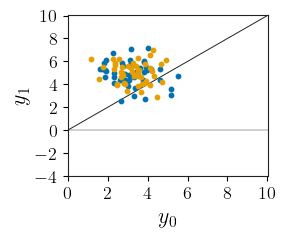

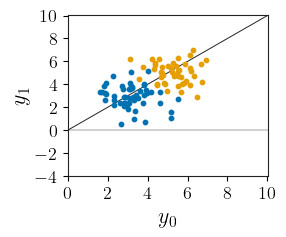

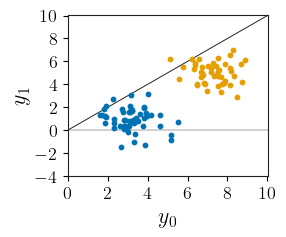

In [3]:
plot_y01(y01, "positive")
plot_y01(y01, "zero", y0_shift=2, y1_shift=-2)
plot_y01(y01, "negative", y0_shift=4, y1_shift=-4)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


./figures/ya-uninformative/kde


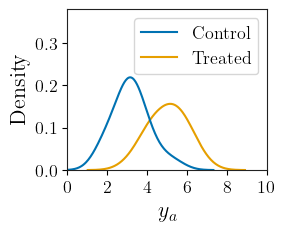

In [4]:
fig, ax = get_fig_ax(figsize=figsize)
y = a*y01[:,1] + (1-a)*y01[:,0]
a_names = np.array(["Control", "Treated"])[a.astype(int)]
y01_df = pd.DataFrame({
    "$y_a$": y,
    "a": a_names})
sns.kdeplot(y01_df, x=y01_df.columns[0], hue="a", ax=ax, bw_adjust=1.5)
legend = ax.get_legend()
if legend is not None:
    legend.set_title(None)
ax.set_xlim(min_x, max_x)
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], ylim[1]*1.65)
ax.set_xticks(xticks)
plt.subplots_adjust(left_adjust, bottom_adjust, right_adjust, top_adjust)
save_my_fig(fig, "ya-uninformative/kde")